In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.io import loadmat

## 1. Outliers via std threshold

In [2]:
N = 1000
time =np.linspace(0,1,N)
signal = np.exp(0.5*np.random.randn(N)) 

##################
out_num = int(np.round(0.05*N))
randpnts = np.random.randint(0 , N , out_num)
R = np.zeros(N) + signal
for i in randpnts:
    R[i] = np.random.rand()*10

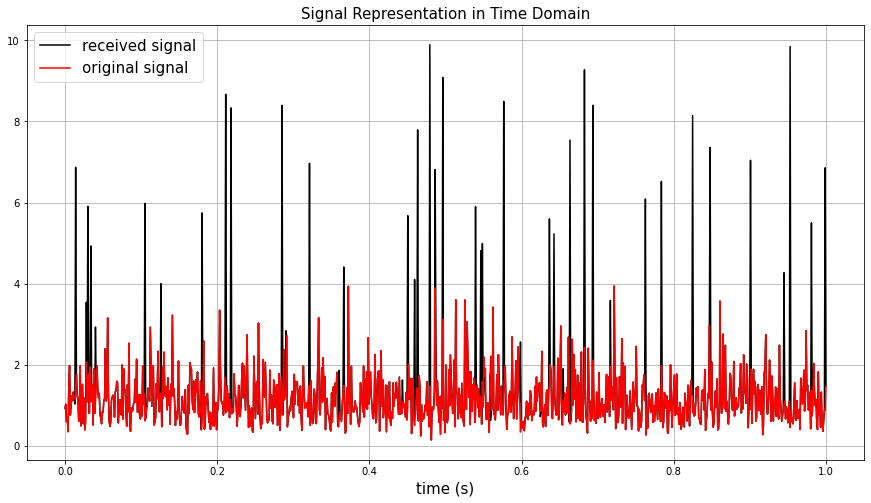

In [3]:
plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'received signal' , c='black')
plt.plot(time , signal , label = 'original signal' , c = 'r')
plt.title('Signal Representation in Time Domain' , fontsize = 15)
plt.xlabel('time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

### 1.1. Smoothing
by smoothing the recevied signal, there would be more damage to the original signal if outliers are present, as smoothing is based on meaning the signal. 

In [4]:
### Smoothing:
R2 = np.append( R[::-1] , np.append(R , R[::-1]))
signal2 = np.append( signal[::-1] , np.append(signal , signal[::-1]))
half_win_size = int(np.round(N/100))
R2_filt = np.zeros(len(R2))
signal2_filt = np.zeros(len(signal2))

for i in range(half_win_size , len(R2)-half_win_size):
    R2_filt[i] = np.mean(R2[i-half_win_size:i+half_win_size])
    signal2_filt[i] = np.mean(signal2[i-half_win_size:i+half_win_size])
    
R_filt = R2_filt[len(R):2*len(R)]   
signal_filt = signal2_filt[len(R):2*len(R)] 

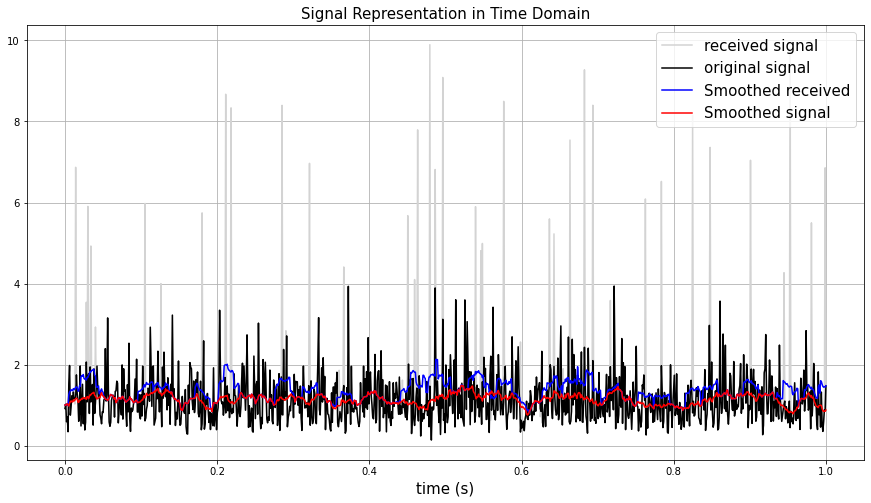

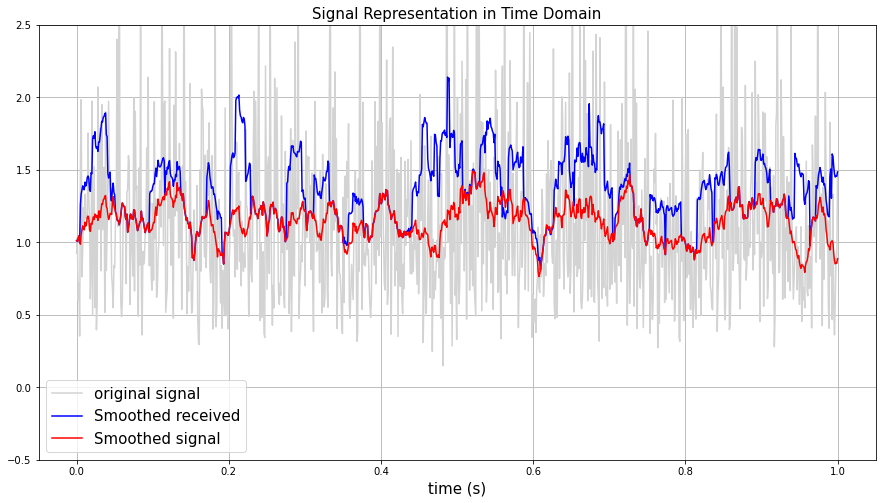

In [5]:
plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'received signal' , c='lightgrey')
plt.plot(time , signal , label = 'original signal' , c = 'black')
plt.plot(time , R_filt , label = 'Smoothed received' , c = 'b')
plt.plot(time , signal_filt , label = 'Smoothed signal' , c = 'r')
plt.title('Signal Representation in Time Domain' , fontsize = 15)
plt.xlabel('time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(time , signal , label = 'original signal' , c = 'lightgrey')
plt.plot(time , R_filt , label = 'Smoothed received' , c = 'b')
plt.plot(time , signal_filt , label = 'Smoothed signal' , c = 'r')
plt.ylim([-0.5,2.5])
plt.title('Signal Representation in Time Domain' , fontsize = 15)
plt.xlabel('time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

### 1.2. finding a relevant threshold based on std

In [6]:
threshold = np.mean(R) + 3*np.sqrt(np.var(R))
R_threshold = np.zeros(len(R))
time_threshold = np.zeros(len(R))
for i in range(len(R)):
    if R[i]>threshold:
        R_threshold[i] = float('NaN')
        time_threshold[i] = float('NaN')
    else:
        R_threshold[i] = R[i]
        time_threshold[i] = time[i]

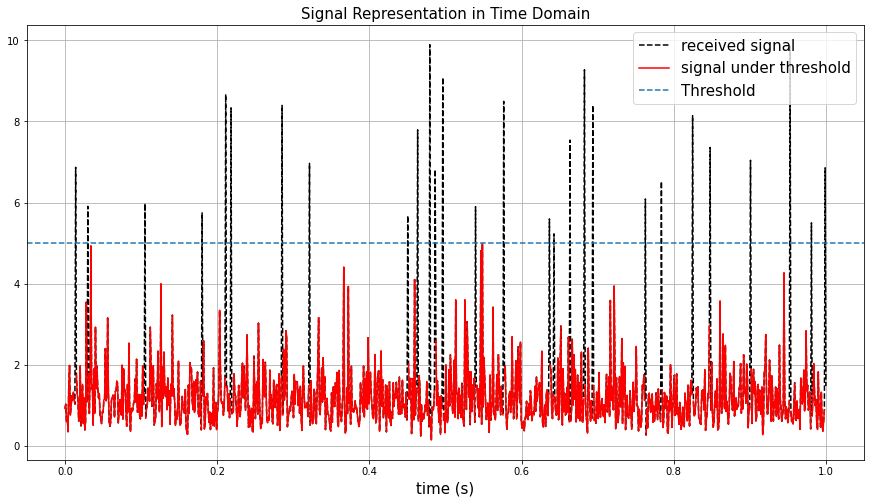

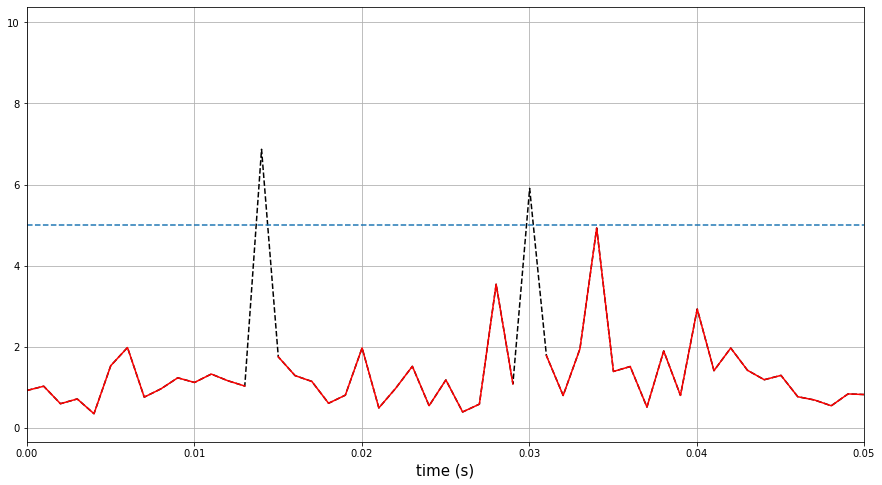

In [7]:
plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'received signal' , c='black' , linestyle = 'dashed')
plt.plot(time , R_threshold , label = 'signal under threshold' , c = 'r')
plt.axhline(y = threshold , xmin = 0 , xmax=1 , linestyle = 'dashed' , label = 'Threshold')
plt.title('Signal Representation in Time Domain' , fontsize = 15)
plt.xlabel('time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'received signal' , c='black' , linestyle = 'dashed')
plt.axhline(y = threshold , xmin = 0 , xmax=1 , linestyle = 'dashed' , label = 'Threshold')
plt.plot(time , R_threshold , label = 'original signal' , c = 'r')
plt.xlabel('time (s)' , fontsize = 15)
plt.xlim([0,0.05])
plt.grid()

In [8]:
R_interp = interp1d(time_threshold , R_threshold)(time)

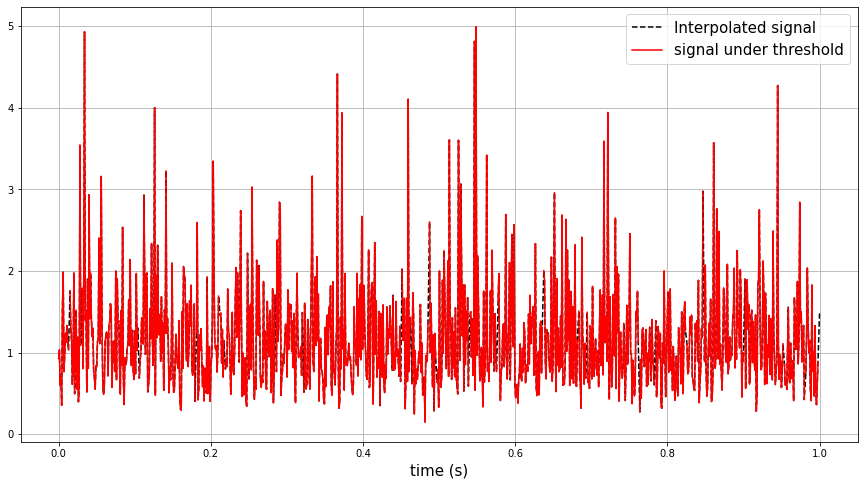

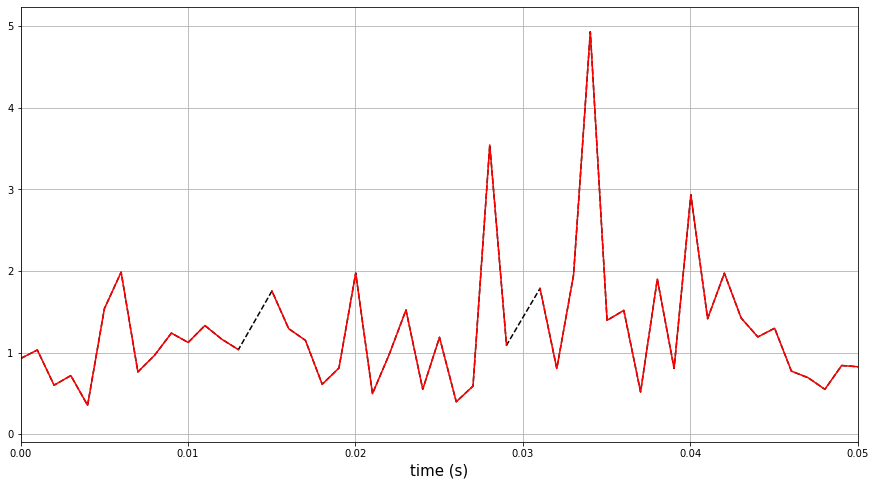

In [9]:
plt.figure(figsize = (15,8))
plt.plot(time , R_interp , label = 'Interpolated signal' , c='black' , linestyle = 'dashed')
plt.plot(time , R_threshold , label = 'signal under threshold' , c = 'r')
plt.xlabel('time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(time , R_interp , label = 'Interpolated signal' , c='black' , linestyle = 'dashed')
plt.plot(time , R_threshold , label = 'signal under threshold' , c = 'r')
plt.xlabel('time (s)' , fontsize = 15)
plt.xlim([0,0.05])
plt.grid()

In [10]:
R_interp2 = np.append( R_interp[::-1] , np.append(R_interp , R_interp[::-1]))
half_win_size = int(np.round(N/100))
R_interp2_filt = np.zeros(len(R_interp2))

for i in range(half_win_size , len(R_interp2)-half_win_size):
    R_interp2_filt[i] = np.mean(R_interp2[i-half_win_size:i+half_win_size])
    
R_interp_filt = R_interp2_filt[len(R):2*len(R)]

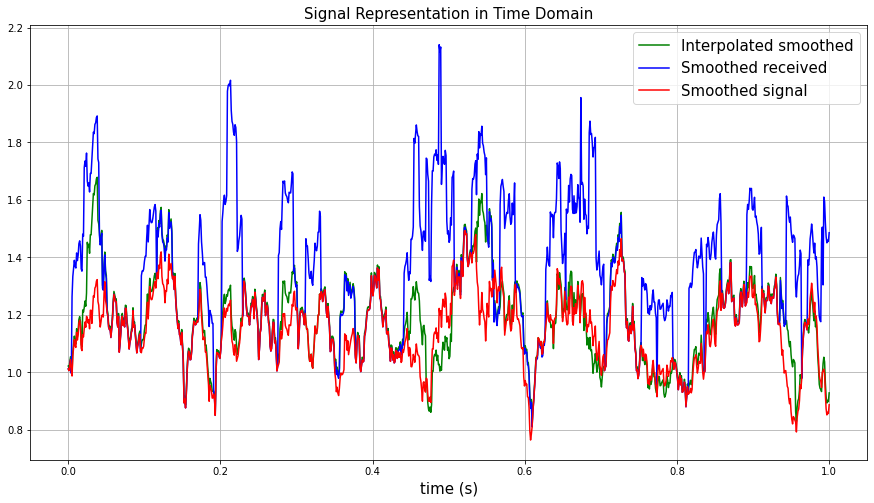

In [11]:
plt.figure(figsize = (15,8))
plt.plot(time , R_interp_filt+0.01 , label = 'Interpolated smoothed' , c = 'green')
plt.plot(time , R_filt , label = 'Smoothed received' , c = 'b')
plt.plot(time , signal_filt , label = 'Smoothed signal' , c = 'r')
plt.title('Signal Representation in Time Domain' , fontsize = 15)
plt.xlabel('time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

## 2. Local thresholding

In [12]:
x = loadmat('forex.mat')
data = x['forex']
N = len(data)
time = np.linspace(0 , 1 , N)

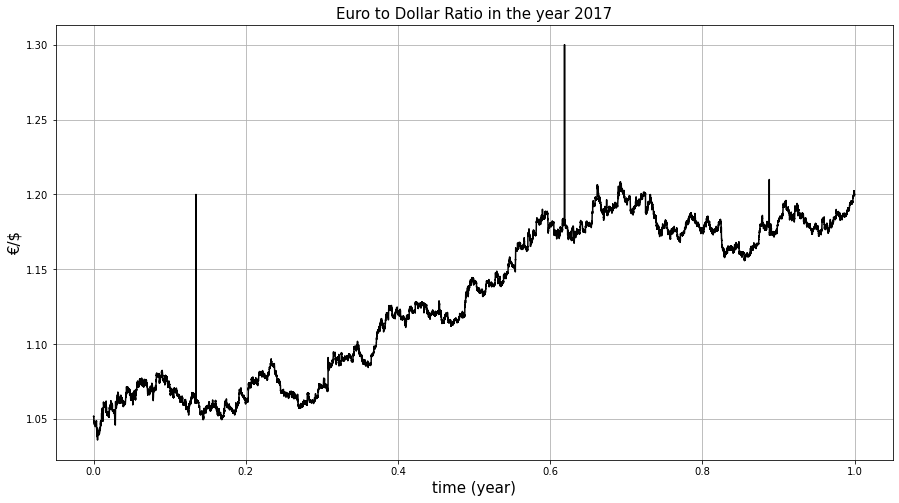

In [13]:
plt.figure(figsize = (15,8))
plt.plot(time , data , label = 'Rate' , c = 'black')
plt.title('Euro to Dollar Ratio in the year 2017' , fontsize = 15)
plt.xlabel('time (year)' , fontsize = 15)
plt.ylabel('€/$' , fontsize = 15)
plt.grid()

### 2.1. Global Thresholding

In [14]:
global_threshold_min = np.mean(data) - 3*np.sqrt(np.var(data))
global_threshold_max = np.mean(data) + 3*np.sqrt(np.var(data))

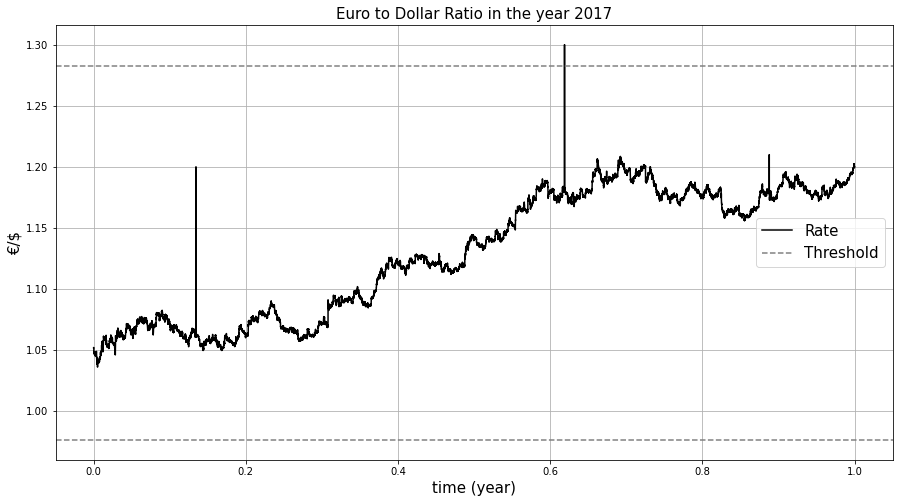

In [15]:
plt.figure(figsize = (15,8))
plt.plot(time , data , label = 'Rate' , c = 'black')
plt.axhline(y = global_threshold_min,
            xmin=0 , xmax=1,
            linestyle = 'dashed' , c='grey')
plt.axhline(y = global_threshold_max,
            xmin=0 , xmax=1 , label = 'Threshold',
            linestyle = 'dashed' , c='grey')
plt.title('Euro to Dollar Ratio in the year 2017' , fontsize = 15)
plt.xlabel('time (year)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('€/$' , fontsize = 15)
plt.grid()

### 2.2. Local Thresholding

In [16]:
win_size = int(np.round(0.05*len(data))/2)
data_thr_min = np.zeros(len(data))
data_thr_max = np.zeros(len(data))
for i in range(len(data)):
    data_temp =  data[np.max([0 , i-win_size]):np.min([len(data) , i+win_size])]
    mean_data = np.mean(data_temp)
    std_data = np.sqrt(np.var(data_temp))
    data_thr_min[i] = mean_data - 3*std_data
    data_thr_max[i] = mean_data + 3*std_data
    
win_size = int(np.round(0.25*len(data))/2)
data_thr_min2 = np.zeros(len(data))
data_thr_max2 = np.zeros(len(data))
for i in range(len(data)):
    data_temp =  data[np.max([0 , i-win_size]):np.min([len(data) , i+win_size])]
    mean_data = np.mean(data_temp)
    std_data = np.sqrt(np.var(data_temp))
    data_thr_min2[i] = mean_data - 3*std_data
    data_thr_max2[i] = mean_data + 3*std_data

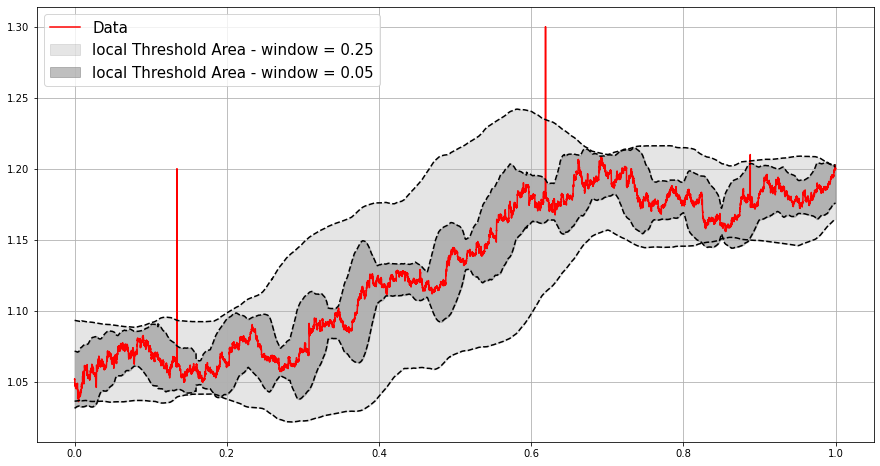

In [17]:
plt.figure(figsize = (15,8))
plt.plot(time , data , c = 'r' , label = 'Data')

plt.plot(time , data_thr_min2 , c='black' , linestyle = 'dashed')
plt.plot(time , data_thr_max2 , c='black' , linestyle = 'dashed')
plt.fill_between(time, data_thr_min2, data_thr_max2 , color='grey' ,alpha=0.2, label='local Threshold Area - window = 0.25')

plt.plot(time , data_thr_min , c='black' , linestyle = 'dashed')
plt.plot(time , data_thr_max , c='black' , linestyle = 'dashed')
plt.fill_between(time, data_thr_min, data_thr_max , color='grey' ,alpha=0.5, label='local Threshold Area - window = 0.05')
plt.legend(fontsize = 15)
plt.grid()

## 3. Outlier Time Window via sliding RMS

In [18]:
N = 2000
p = 12

time = np.linspace(0 , 1 , N)

signal = interp1d(np.arange(p) , np.random.randn(p))(np.linspace(1,p-1,N))
signal = signal + np.random.randn(N)

out = np.append(np.zeros(500) , 10*np.random.randn(50))
out = np.append(out , 10*np.zeros(1000))
out = np.append(out , 20*np.random.randn(150))
out = np.append(out , np.zeros(N - len(out)))

R = signal + out

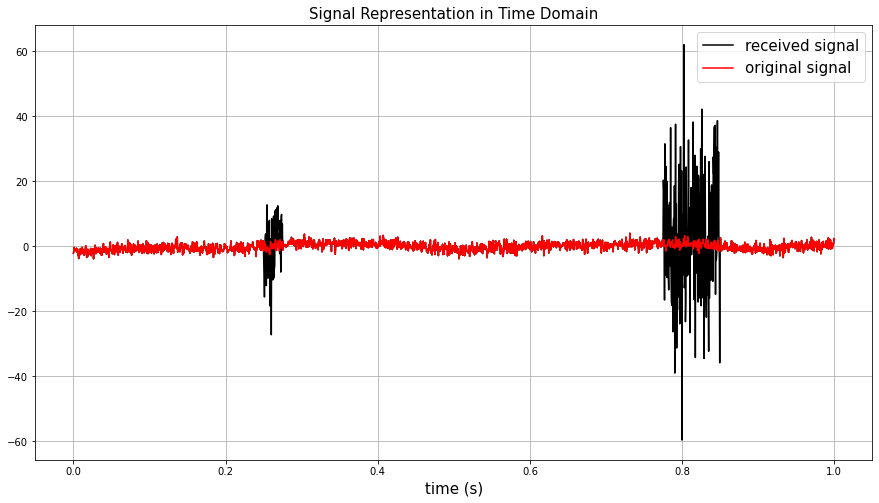

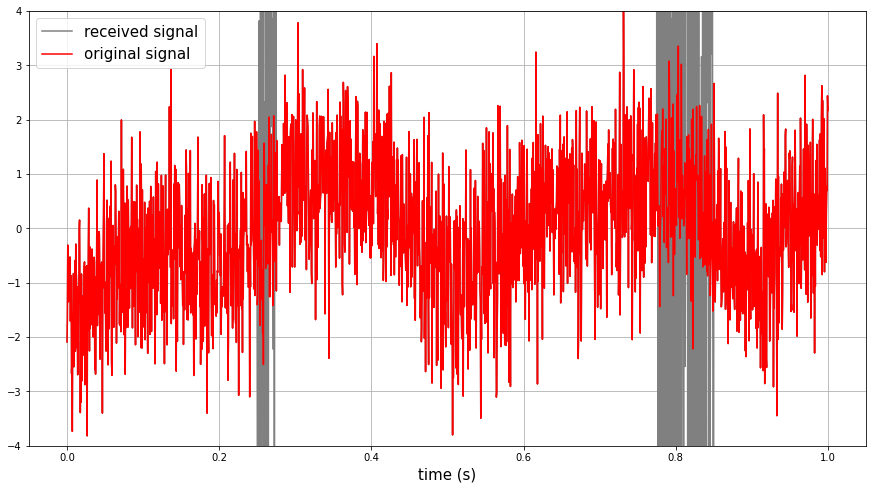

In [19]:
plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'received signal' , c='black')
plt.plot(time , signal , label = 'original signal' , c = 'r')
plt.title('Signal Representation in Time Domain' , fontsize = 15)
plt.xlabel('time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'received signal' , c='grey')
plt.plot(time , signal , label = 'original signal' , c = 'r')
plt.xlabel('time (s)' , fontsize = 15)
plt.ylim([-4,4])
plt.legend(fontsize = 15)
plt.grid()

### 3.1. Local MSE

In [80]:
win_size_list = np.arange(0.01 , 0.2 , 0.005)
R_total = np.array([])
for j in win_size_list:
    R_var = np.zeros(len(R))
    win_size = int(np.round(j*len(R))/2)
    for i in range(len(R)):
        R_temp =  R[np.max([0 , i-win_size]):np.min([len(R) , i+win_size])]
        mean_R = np.mean(R_temp)
        R_var[i] = np.mean(np.abs(R_temp - mean_R)**2)
    R_total = np.append(R_total , R_var)
R_total = np.reshape(R_total , (-1,len(R_var)))

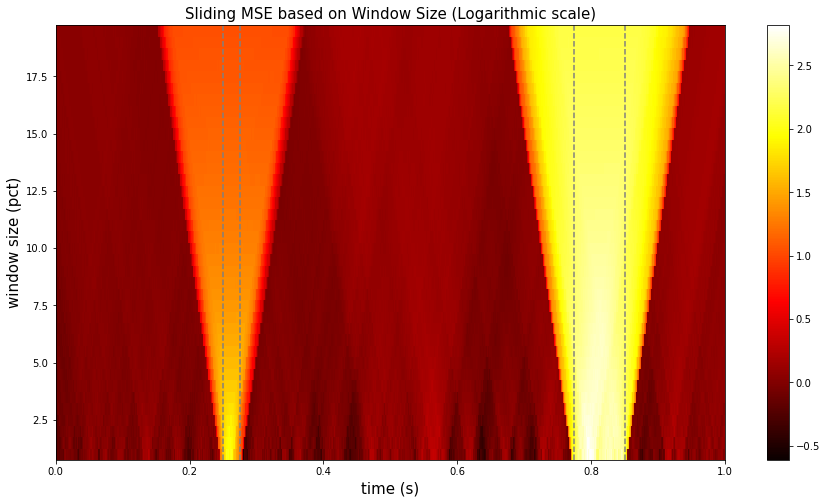

In [88]:
t, w = np.meshgrid(time , win_size_list*100)
fig = plt.figure(figsize = (15,8))
plt.pcolormesh(t, w , np.log10(R_total) ,  cmap = 'hot' , shading='auto')
plt.axvline(x = 500/2000 , ymin= 0 , ymax = 1 , linestyle = 'dashed' , c='grey')
plt.axvline(x = 550/2000 , ymin= 0 , ymax = 1 , linestyle = 'dashed' , c='grey')
plt.axvline(x = 1550/2000 , ymin= 0 , ymax = 1 , linestyle = 'dashed' , c='grey')
plt.axvline(x = 1700/2000 , ymin= 0 , ymax = 1 , linestyle = 'dashed' , c='grey')
plt.colorbar()
plt.xlabel('time (s)' , fontsize = 15)
plt.ylabel('window size (pct)' , fontsize = 15)
plt.title('Sliding MSE based on Window Size (Logarithmic scale)', fontsize = 15);

In [20]:
win_size = int(np.round(0.01*len(R))/2)
win_size_thr = int(np.round(0.5*len(R))/2)
R_var = np.zeros(len(R))
for i in range(len(R)):
    R_temp =  R[np.max([0 , i-win_size]):np.min([len(R) , i+win_size])]
    mean_R = np.mean(R_temp)
    R_var[i] = np.mean(np.abs(R_temp - mean_R)**2)
    
R_threshold = np.mean(R_var) + 3*np.sqrt(np.var(R_var))

thr_local = np.zeros(len(R_var))
for i in range(len(R_var)):
    R_var_temp = R_var[np.max([0 , i-win_size_thr]):np.min([len(R_var) , i+win_size_thr])]
    mean_R_var = np.mean(R_var_temp)
    thr_local[i] = mean_R_var #+ 3*np.sqrt(np.var(R_var_temp))

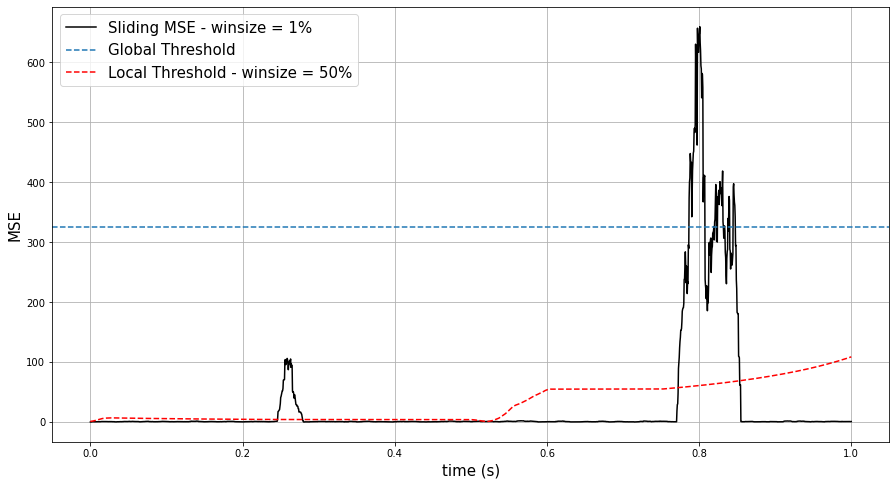

In [21]:
plt.figure(figsize = (15,8))
plt.plot(time , R_var , c = 'black' , label = 'Sliding MSE - winsize = 1%')
plt.axhline(y = R_threshold , xmin=0 , xmax=1 , linestyle = 'dashed',
           label = 'Global Threshold')
plt.plot(time , thr_local , label = 'Local Threshold - winsize = 50%' , linestyle = 'dashed' , c='r')
plt.xlabel('time (s)' , fontsize = 15)
plt.ylabel('MSE' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

In [22]:
R_clean = np.zeros(len(R))
for i in range(len(R)):
    if (thr_local[i] < R_var[i] ):
        R_clean[i] = float('NaN')
    else:
        R_clean[i] = R[i]

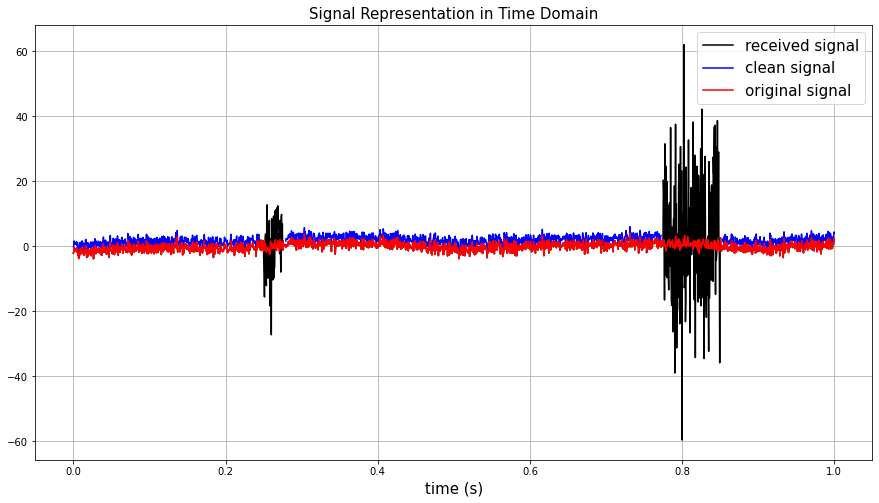

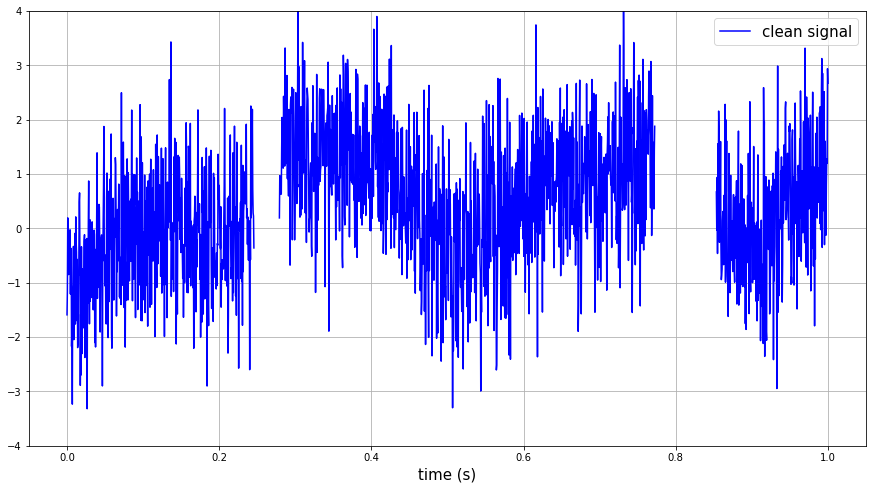

In [23]:
plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'received signal' , c='black')
plt.plot(time , R_clean+2 , label = 'clean signal' , c='b')
plt.plot(time , signal , label = 'original signal' , c = 'r')
plt.title('Signal Representation in Time Domain' , fontsize = 15)
plt.xlabel('time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(time , R_clean+0.5 , label = 'clean signal' , c='b')
plt.xlabel('time (s)' , fontsize = 15)
plt.ylim([-4,4])
plt.legend(fontsize = 15)
plt.grid()

In [24]:
count_1 = 0
count_2 = 0
start_1 = 0
start_2 = 0

for i in range(len(R_clean)):
    #part-one:
    if time[i]<0.4:
        if np.isnan(R_clean[i]):
            count_1 +=1
            if start_1 == 0:
                start_1 = i
    #part-two:
    else:
        if np.isnan(R_clean[i]):
            count_2 +=1
            if start_2 == 0:
                start_2 = i

In [25]:
band_11 = R_clean[start_1-count_1:start_1]
band_12 = R_clean[start_1+count_1:2*count_1+start_1]
band_21 = R_clean[start_2-count_2:start_2]
band_22 = R_clean[start_2+count_2:2*count_2+start_2]

band_11_fft = np.fft.fft(band_11/len(band_11))
band_12_fft = np.fft.fft(band_12/len(band_12))
band_21_fft = np.fft.fft(band_21/len(band_21))
band_22_fft = np.fft.fft(band_22/len(band_22))

band_1 = np.real(np.fft.ifft(band_11_fft+band_12_fft))*len(band_11)
band_2 = np.real(np.fft.ifft(band_21_fft+band_22_fft))*len(band_21)

band_1 = band_1 - np.mean(band_1)
band_2 = band_2 - np.mean(band_2)

band_1 = band_1 + np.linspace(np.mean(R_clean[start_1-20:start_1-1]),
                              np.mean(R_clean[start_1+count_1+1:start_1+count_1+20]) , len(band_1))
band_2 = band_2 + np.linspace(np.mean(R_clean[start_2-20:start_2-1]),
                              np.mean(R_clean[start_2+count_2+1:start_2+count_2+20]) , len(band_2))

In [26]:
count_1 = 0
count_2 = 0
R_interp = np.zeros(len(R_clean))
for i in range(len(R_clean)):
    #part-one:
    if time[i]<0.4:
        if np.isnan(R_clean[i]):
            R_interp[i] = band_1[count_1]
            count_1 += 1 
        else:
            R_interp[i] = R[i]
    #part-two:
    else:
        if np.isnan(R_clean[i]):
            R_interp[i] = band_2[count_2]
            count_2 += 1 
        else:
            R_interp[i] = R[i]         

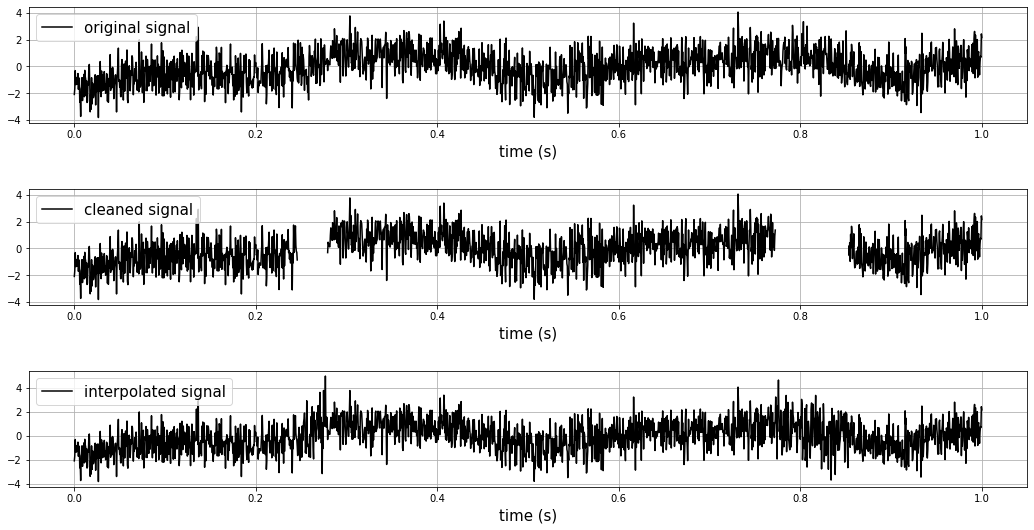

In [27]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.plot(time , signal , label = 'original signal' , c = 'black')
plt.xlabel('time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.tight_layout(pad=3.0)
plt.grid()

plt.subplot(3,1,2)
plt.plot(time , R_clean , label = 'cleaned signal' , c = 'black')
plt.xlabel('time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.tight_layout(pad=3.0)
plt.grid()

plt.subplot(3,1,3)
plt.plot(time , R_interp , label = 'interpolated signal' , c = 'black')
plt.xlabel('time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.tight_layout(pad=3.0)
plt.grid()